# Covid-19 Data Analysis

### Importing the necessary libraries. 

In [47]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import jinja2 as jin
import locale
import inflect

#Formatting to show interanation system format.
pd.options.display.float_format = '{:,}'.format

#reading the dataset.
covid_data = pd.read_csv('owid-covid-data.csv')

#checking how the dataset looks like.
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN


In [3]:
covid_data.shape #checking the no of rows and columns.

(339550, 67)

In [4]:
covid_data.duplicated().sum() #Counting duplicated rows.

0

### Exploring the data and Cleaning it up for Analysis

In [5]:
covid_data.head() #checking the start of the data.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,"41,128,772.0",NaN,NaN,NaN,NaN


In [6]:
covid_data.tail() #checking the end of the data.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
339545,ZWE,Africa,Zimbabwe,2023-09-02,"265,737.0",6.0,0.857,"5,717.0",0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,"16,320,539.0",NaN,NaN,NaN,NaN
339546,ZWE,Africa,Zimbabwe,2023-09-03,"265,737.0",0.0,0.857,"5,717.0",0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,"16,320,539.0",NaN,NaN,NaN,NaN
339547,ZWE,Africa,Zimbabwe,2023-09-04,"265,737.0",0.0,0.857,"5,717.0",0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,"16,320,539.0",NaN,NaN,NaN,NaN
339548,ZWE,Africa,Zimbabwe,2023-09-05,"265,737.0",0.0,0.857,"5,717.0",0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,"16,320,539.0",NaN,NaN,NaN,NaN
339549,ZWE,Africa,Zimbabwe,2023-09-06,"265,737.0",0.0,0.857,"5,717.0",0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,"16,320,539.0",NaN,NaN,NaN,NaN


In [7]:
covid_data.info() #Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339550 entries, 0 to 339549
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    339550 non-null  object 
 1   continent                                   323419 non-null  object 
 2   location                                    339550 non-null  object 
 3   date                                        339550 non-null  object 
 4   total_cases                                 301840 non-null  float64
 5   new_cases                                   330286 non-null  float64
 6   new_cases_smoothed                          329027 non-null  float64
 7   total_deaths                                280505 non-null  float64
 8   new_deaths                                  330329 non-null  float64
 9   new_deaths_smoothed                         329099 non-null  float64
 

In [8]:
covid_data.date = pd.to_datetime(covid_data.date) #converting to date time.

In [9]:
covid_data.info() #checking to see if it worked.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339550 entries, 0 to 339549
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    339550 non-null  object        
 1   continent                                   323419 non-null  object        
 2   location                                    339550 non-null  object        
 3   date                                        339550 non-null  datetime64[ns]
 4   total_cases                                 301840 non-null  float64       
 5   new_cases                                   330286 non-null  float64       
 6   new_cases_smoothed                          329027 non-null  float64       
 7   total_deaths                                280505 non-null  float64       
 8   new_deaths                                  330329 non-null  float64      

In [10]:
covid_data.date.dt.year

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
339545    2023
339546    2023
339547    2023
339548    2023
339549    2023
Name: date, Length: 339550, dtype: int32

In [11]:
covid_data.describe() #Numeric Summary of data.

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,339550,"301,840.0","330,286.0","329,027.0","280,505.0","330,329.0","329,099.0","301,840.0","330,286.0","329,027.0",...,"194,760.0","128,937.0","232,364.0","312,348.0","255,161.0","339,550.0","11,752.0","11,752.0","11,752.0","11,752.0"
mean,2021-11-04 22:59:09.851273472,"6,455,497.504760801","9,883.633051355491","9,921.227223395043","84,724.40270583412",88.07387786116266,88.39880223883996,"98,330.69785706668",149.35318158202284,149.91947439875753,...,32.910007573423705,50.79017154889597,3.0971020338778814,73.71565891249503,0.7224790269672873,"128,231,080.63973789","51,199.82561454949",9.764985534377125,11.640143805309735,"1,627.4122886500795"
min,2020-01-01 00:00:00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.7,1.188,0.1,53.28,0.394,47.0,"-37,726.098",-44.23,-95.92,"-2,142.3403"
25%,2020-12-06 00:00:00,"7,736.0",0.0,0.429,125.0,0.0,0.0,"2,446.466",0.0,0.072,...,22.6,20.859,1.3,69.59,0.602,"449,002.0",92.50000575,1.19,-1.6,57.0163455
50%,2021-11-05 00:00:00,"67,954.0",2.0,27.143,"1,287.0",0.0,0.143,"26,268.68",0.229,7.334,...,33.1,49.839,2.5,75.05,0.74,"5,882,259.0","5,704.5005",8.02,5.905,"1,048.4357"
75%,2022-10-05 00:00:00,"710,656.5",288.0,528.714,"11,563.0",3.0,5.571,"126,417.95575",38.566,87.436,...,41.3,83.241,4.2,79.46,0.829,"28,301,700.0","36,394.903750000005",15.4525,16.75,"2,681.920475"
max,2023-09-09 00:00:00,"770,436,563.0","8,401,961.0","6,402,036.286","6,956,887.0","27,939.0","14,822.0","737,554.506","228,872.025","37,241.781",...,78.1,100.0,13.8,86.75,0.957,"7,975,105,024.0","1,289,776.5",76.55,386.92,"10,292.916"
std,NaN,"39,563,212.47624301","111,947.27261023228","95,911.61566616215","434,307.5854534067",622.8814527109487,567.5093479224508,"148,239.4756252291","1,181.1080000510806",608.6200989997678,...,13.574326340179725,31.956863844413313,2.5483762614095715,7.396223812659499,0.1489900258480868,"660,038,878.3254478","144,739.41664455045",12.583555002685847,25.533260200833062,"1,916.0336393990012"


In [12]:
covid_data.describe(include='object') #Summary of non-numeric data.

,iso_code,continent,location,tests_units
count,339550,323419,339550,106788
unique,255,6,255,4
top,CZE,Africa,Czechia,tests performed
freq,1346,76552,1346,80099


In [13]:
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
covid_data.columns[np.sum(covid_data.isnull())!=0] #checking for colums with missing values.

c:\Users\pip3m\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['continent', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people

In [15]:
covid_data.columns[np.sum(covid_data.isnull())==0] #checking for colums with no missing values.

Index(['iso_code', 'location', 'date', 'population'], dtype='object')

In [16]:
# Checking for unique values in dataset.
for col in covid_data.columns:
    unique = covid_data[col].nunique()
    print(col + " has " + str(unique) + " unique values.")

iso_code has 255 unique values.
continent has 6 unique values.
location has 255 unique values.
date has 1348 unique values.
total_cases has 133770 unique values.
new_cases has 27801 unique values.
new_cases_smoothed has 49767 unique values.
total_deaths has 51447 unique values.
new_deaths has 4659 unique values.
new_deaths_smoothed has 11676 unique values.
total_cases_per_million has 173797 unique values.
new_cases_per_million has 82601 unique values.
new_cases_smoothed_per_million has 95546 unique values.
total_deaths_per_million has 103074 unique values.
new_deaths_per_million has 9845 unique values.
new_deaths_smoothed_per_million has 10568 unique values.
reproduction_rate has 380 unique values.
icu_patients has 4092 unique values.
icu_patients_per_million has 13185 unique values.
hosp_patients has 10197 unique values.
hosp_patients_per_million has 25536 unique values.
weekly_icu_admissions has 1674 unique values.
weekly_icu_admissions_per_million has 4335 unique values.
weekly_hosp

Removing locations with no continent, to make our analysis easier. 

In [17]:
#replacing empty continent cells with NaN.
covid_data.continent.replace('',np.nan,inplace=True)
#Dropping all rows of continents with NaN values.
covid_data.dropna(subset=['continent'], inplace=True)

### Lets look at a few simple stats from the database.
* Countries with highest deaths and cases.
* Death percentages based on total cases.
* Percentage of people vaccinated in countries and total vaccinations per country.
* Total Cases worldwide & Deaths.
* Countries with most cardiovascular deaths.
* Countries with highest and lowest GDP's.

### #1 Top 5 countries with highest deaths and cases.

In [18]:
# Outputting all the locations included in the dataset.
covid_data['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswat

In [19]:
#removing countries with no covid cases and deaths. 
covid_data.total_cases.replace('',np.nan,inplace=True)
covid_data.dropna(subset=['total_cases'],inplace=True)

covid_data.total_deaths.replace('',np.nan,inplace=True)
covid_data.dropna(subset=['total_deaths'],inplace=True)

# grouping by location and getting total for each country.
covid_countries_sorted = covid_data.groupby(['location']).tail(1)[['location','population','total_cases','total_deaths']]

# Sorting the total cases per country array.
covid_countries_sorted = covid_countries_sorted.sort_values(['total_cases','total_deaths'],ascending=False)

#converting our series to a dataframe and having a look at all countries.
#covid_countries_sorted.to_frame()

In [20]:

#Data for Top 5 countries with the highest cases.
covid_countries_sorted.head(5)

,location,population,total_cases,total_deaths
320887,United States,"338,289,856.0","103,436,829.0","1,127,152.0"
60442,China,"1,425,887,360.0","99,306,563.0","121,679.0"
136886,India,"1,417,173,120.0","44,997,326.0","532,023.0"
103343,France,"67,813,000.0","38,997,490.0","167,985.0"
111401,Germany,"83,369,840.0","38,437,756.0","174,979.0"


In [21]:
#Top 5 countries with the lowest cases.
covid_countries_sorted.tail(5)

,location,population,total_cases,total_deaths
10743,Anguilla,"15,877.0","3,904.0",12.0
334174,Wallis and Futuna,"11,596.0","3,550.0",8.0
259189,Saint Pierre and Miquelon,"5,885.0","3,426.0",2.0
314172,Tuvalu,"11,335.0","2,943.0",1.0
199471,Montserrat,"4,413.0","1,403.0",8.0


In [22]:
# Exporting for tableu visulization later on.
covid_countries_sorted.to_csv("covid_cases_countrywise.csv",index=False)

In [23]:
# Sorting by the total deaths per country.
covid_countries_sorted = covid_countries_sorted.sort_values(['total_deaths','total_cases'],ascending=False)


In [24]:
# Top 5 countries with the highest deaths.
high_dea_countries = covid_countries_sorted.head(5)
high_dea_countries.head()

,location,population,total_cases,total_deaths
320887,United States,"338,289,856.0","103,436,829.0","1,127,152.0"
41638,Brazil,"215,313,504.0","37,717,062.0","704,659.0"
136886,India,"1,417,173,120.0","44,997,326.0","532,023.0"
249788,Russia,"144,713,312.0","22,994,849.0","399,999.0"
191413,Mexico,"127,504,120.0","7,633,355.0","334,336.0"


In [25]:
# Top 5 countries with the lowest deaths.
low_dea_countries = covid_countries_sorted.tail(5)
low_dea_countries.tail()

,location,population,total_cases,total_deaths
252474,Saint Barthelemy,"10,994.0","5,507.0",5.0
65814,Cook Islands,"17,032.0","7,152.0",2.0
259189,Saint Pierre and Miquelon,"5,885.0","3,426.0",2.0
206186,Nauru,"12,691.0","5,393.0",1.0
314172,Tuvalu,"11,335.0","2,943.0",1.0


In [26]:
# Exporting for tableu visulization later on.
covid_countries_sorted.to_csv("covid_deaths_countrywise.csv",index=False)

### Graphing Total Deaths vs Total Cases

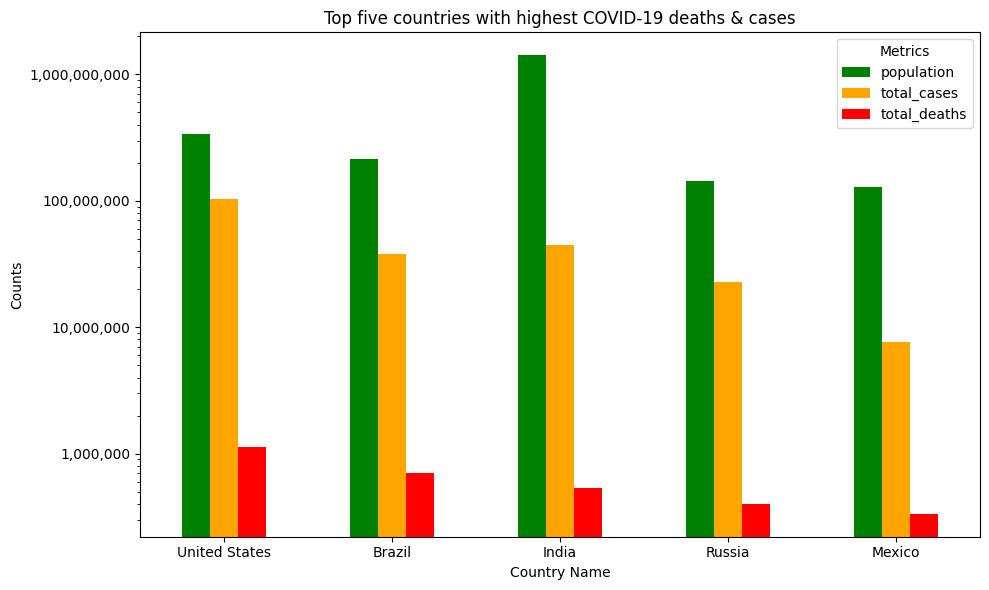

In [27]:
#Plotting graph for countries with highest deaths and cases.

import matplotlib.ticker as ticker

barColors = ['Green','Orange','Red']

ax = high_dea_countries.plot(kind='bar', x='location', figsize=(10, 6), color=barColors)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))


# Adding labels
plt.title('Top five countries with highest COVID-19 deaths & cases')
plt.xlabel('Country Name')
plt.xticks(rotation=0)
plt.legend(title='Metrics')


# Show the plot
plt.tight_layout()
plt.show()


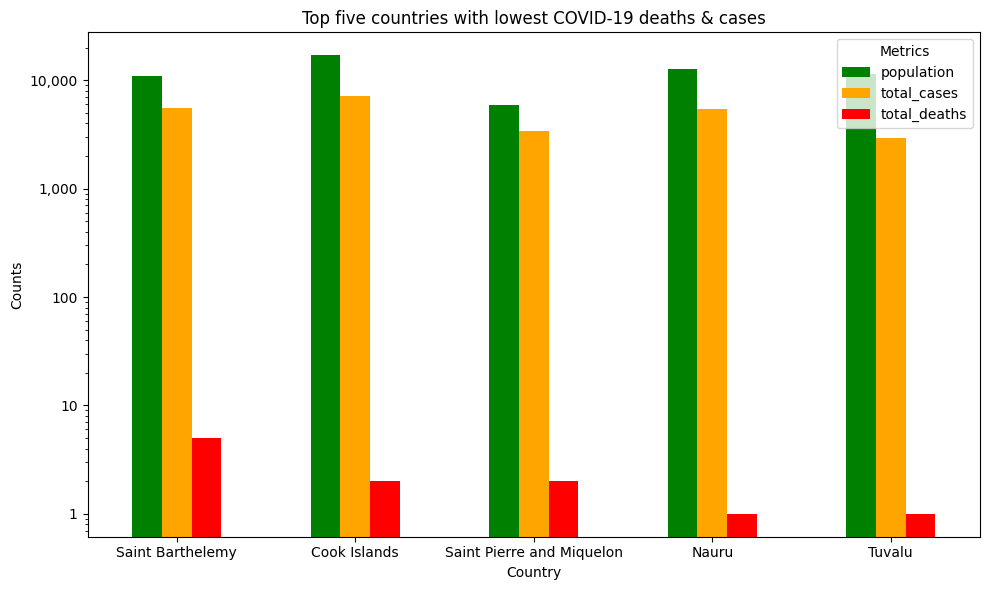

In [28]:
#Plotting graph for countries with lowest deaths and cases.

import matplotlib.ticker as ticker

barColors = ['Green','Orange','Red']

ax = low_dea_countries.plot(kind='bar', x='location', figsize=(10, 6),color=barColors)
ax.set_yscale('log')
ax.set_ylabel('Counts')
ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(int(x))))


# Adding labels
plt.title('Top five countries with lowest COVID-19 deaths & cases')
plt.xlabel('Country')
plt.xticks(rotation=0)
plt.legend(title='Metrics')

# Show the plot
plt.tight_layout()
plt.show()


### #2 Death Percentages in relation to total cases for each country.

Death percentage in countries with highest covid cases recorded. 

In [29]:
#Calculating percentage of deaths based on total cases. 
high_dea_countries.loc[:,"Death Percentage"] = (
    high_dea_countries["total_deaths"] / high_dea_countries["total_cases"]
)

high_dea_countries.sort_values(['Death Percentage'],ascending=False)

#Rounding off percentages to two decimal places.
high_dea_countries.loc[:,'Death Percentage'] = (high_dea_countries['Death Percentage'] * 100).apply(lambda x: f'{x:.2f}%')

#Previewing the data.
high_dea_countries.head()

C:\Users\pip3m\AppData\Local\Temp\ipykernel_5764\3663584717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_dea_countries.loc[:,"Death Percentage"] = (


,location,population,total_cases,total_deaths,Death Percentage
320887,United States,"338,289,856.0","103,436,829.0","1,127,152.0",1.09%
41638,Brazil,"215,313,504.0","37,717,062.0","704,659.0",1.87%
136886,India,"1,417,173,120.0","44,997,326.0","532,023.0",1.18%
249788,Russia,"144,713,312.0","22,994,849.0","399,999.0",1.74%
191413,Mexico,"127,504,120.0","7,633,355.0","334,336.0",4.38%


In [30]:
# Exporting for tableu visulization later on.
high_dea_countries.to_csv("covid_death%_countrywise.csv",index=False)

Death percentage in countries with lowest covid cases recorded. 

In [31]:
# Calculating percentage of deaths based on total cases.
low_dea_countries.loc[:, "Death Percentage"] = (
    low_dea_countries["total_deaths"] / low_dea_countries["total_cases"]
)

low_dea_countries.style.background_gradient(cmap="PiYG", subset='total_deaths')

# Rounding off percentages to two decimal places.
low_dea_countries.loc[:, 'Death Percentage'] = (
    low_dea_countries['Death Percentage'] * 100).apply(lambda x: f'{x:.2f}%')

# Previewing the data.
low_dea_countries.head()

C:\Users\pip3m\AppData\Local\Temp\ipykernel_5764\2962624489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_dea_countries.loc[:, "Death Percentage"] = (


,location,population,total_cases,total_deaths,Death Percentage
252474,Saint Barthelemy,"10,994.0","5,507.0",5.0,0.09%
65814,Cook Islands,"17,032.0","7,152.0",2.0,0.03%
259189,Saint Pierre and Miquelon,"5,885.0","3,426.0",2.0,0.06%
206186,Nauru,"12,691.0","5,393.0",1.0,0.02%
314172,Tuvalu,"11,335.0","2,943.0",1.0,0.03%


In [32]:
# Exporting for tableu visulization later on.
high_dea_countries.to_csv("lowest_covid_death%_countrywise.csv",index=False)

### #3 Percentage of people vaccinated and total vaccinations data.

 **Data for countries with highest and lowest total vaccinations**

In [33]:
#removing countries with no vaccination data. 
covid_data.total_vaccinations.replace('',np.nan,inplace=True)
covid_data.dropna(subset=['total_vaccinations'],inplace=True)

# Lets create a dataframe with all the vaccination columns we require. 
# grouping by location and getting total for each country.
covid_vac_data = covid_data.groupby(['location']).tail(1)[['location','population','total_vaccinations','people_vaccinated','people_fully_vaccinated']]

# Sorting by the total vaccinations per country.
covid_vac_data = covid_vac_data.sort_values(['total_vaccinations'],ascending=False)

In [34]:

# Top 5 highest countries with vaccinations.
covid_vac_data.head()


,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated
60233,China,"1,425,887,360.0","3,491,077,000.0","1,310,292,000.0","1,276,760,000.0"
136886,India,"1,417,173,120.0","2,206,740,986.0","1,027,417,033.0","951,984,635.0"
320767,United States,"338,289,856.0","676,728,782.0","270,227,181.0","230,637,348.0"
41470,Brazil,"215,313,504.0","486,436,436.0","189,643,431.0","176,164,186.0"
138139,Indonesia,"275,501,344.0","447,595,845.0","203,845,350.0","174,893,201.0"


In [35]:
#Top 5 lowest countries with vaccinations. 
covid_vac_data.tail()


,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated
36874,Bonaire Sint Eustatius and Saba,"27,052.0","35,845.0","19,109.0","16,736.0"
205988,Nauru,"12,691.0","32,157.0","13,106.0","11,346.0"
10563,Anguilla,"15,877.0","24,604.0","10,854.0","10,380.0"
333948,Wallis and Futuna,"11,596.0","18,058.0","7,150.0","6,803.0"
199207,Montserrat,"4,413.0","4,619.0","2,104.0","1,952.0"


In [36]:
# Exporting for tableu visulization later on.
covid_vac_data.to_csv("covid_vac_data.csv",index=False)

 **Data for Percentage of total population vaccinated for each country**

In [37]:
# Calculating the percentage of population vaccinated.
covid_vac_data.loc[:, "Population Vaccinated %"] = (
    covid_vac_data["people_fully_vaccinated"] / covid_vac_data["population"]
)

# Sorting by Population Vaccinated percentage to see the most vaccinated countries.
covid_vac_data = covid_vac_data.sort_values(['Population Vaccinated %'],ascending=False)

# Rounding off percentages.
covid_vac_data.loc[:, 'Population Vaccinated %'] = (
    covid_vac_data['Population Vaccinated %'] * 100).apply(lambda x: f'{x:.2f}%' if x < 1 else f'{x:.0f}%' )

In [38]:
highest_vac_data = covid_vac_data.head(5)
highest_vac_data


,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,Population Vaccinated %
113823,Gibraltar,"32,677.0","132,810.0","42,175.0","41,465.0",127%
245637,Qatar,"2,695,131.0","7,609,178.0","2,852,178.0","2,852,178.0",106%
317758,United Arab Emirates,"9,441,138.0","24,922,054.0","9,991,089.0","9,792,266.0",104%
44256,Brunei,"449,002.0","1,293,100.0","451,149.0","446,714.0",99%
273580,Singapore,"5,637,022.0","14,727,569.0","5,137,637.0","5,093,804.0",90%


In [39]:
# Exporting for tableu visulization later on.
highest_vac_data.to_csv("highest_covid_vac_data.csv",index=False)

In [40]:
lowest_vac_data = covid_vac_data.dropna(subset=['people_vaccinated'],inplace=True)
lowest_vac_data = covid_vac_data.dropna(subset=['people_fully_vaccinated'],inplace=True)


lowest_vac_data = covid_vac_data.tail(5)
lowest_vac_data

# Personally checking for the country data i live in.
# covid_vac_data[covid_vac_data['location'] == 'Pakistan']

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,Population Vaccinated %
268486,Senegal,"17,316,452.0","3,093,244.0","2,684,696.0","1,503,332.0",9%
234886,Papua New Guinea,"10,142,625.0","737,695.0","382,020.0","321,192.0",3%
128764,Haiti,"11,585,003.0","664,150.0","521,396.0","350,403.0",3%
336785,Yemen,"33,696,612.0","1,282,460.0","1,037,766.0","794,265.0",2%
48338,Burundi,"12,889,583.0","41,316.0","36,909.0","36,321.0",0.28%


In [41]:
# Exporting for tableu visulization later on.
lowest_vac_data.to_csv("lowest_covid_vac_data.csv",index=False)

### Total Cases Worldwide & Deaths.

In [42]:
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
p = inflect.engine()

# Calculating total deaths worldwide & cases
total_deaths = sum(covid_countries_sorted['total_deaths'])
total_cases = sum(covid_countries_sorted['total_cases'])

# Worldwide population as of 11/Sept/2023.
total_population = 8059930244

# Format and print the numbers
print('Total Cases Worldwide: ' + str(locale.format_string("%d", total_cases, grouping=True)))
print('Total Deaths Worldwide: '+ str(locale.format_string("%d", total_deaths, grouping=True)))
print('Worldwide Population: ' + str(locale.format_string("%d", total_population, grouping=True)))
print('Percentage of worldwide population infected: ' + str("{:.2f}%".format(total_cases/total_population * 100)))
print('Percentage of worldwide deaths: ' + str("{:.2f}%".format(total_deaths/total_population * 100)))


#If you want to take a look at the covid case/death data for every country. (NOTE: I have removed countries with no covid cases/deaths for relevance)
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None) 

#If you want to reset max column display. 
#pd.reset_option('display.max_columns') 
#pd.reset_option('display.max_rows') 

#Uncomment this to see the whole dataset. 
#covid_countries_sorted 

Total Cases Worldwide: 770,431,496
Total Deaths Worldwide: 6,956,887
Worldwide Population: 8,059,930,244
Percentage of worldwide population infected: 9.56%
Percentage of worldwide deaths: 0.09%


* Cases worldwide as of 9/6/2023 have crossed 770 Million worldwide. 
* Deaths are recorded at 6 million nine hundred fifty six thousand worldwide.
* Roughly close to 10% of the world population has been infected with covid. It is important to note that this percentage is a rough estimate as the 'total cases' data can include individuals with repeated infections. 
* A total of 0.09% of the worldwide population has succumbed to the coronavirus, a huge number considering the population of the world has crossed 8 billion.



### Countries with highest cardiovascular death rates.

In [43]:
#grouping by country and death rate.
country_cardio_data = covid_data.groupby(['location']).tail(1)[['location','cardiovasc_death_rate','median_age','life_expectancy']]

#removing countries with no cardiovasc data.
country_cardio_data.dropna(subset=['cardiovasc_death_rate'],inplace=True)
country_cardio_data = country_cardio_data.sort_values(['cardiovasc_death_rate'],ascending=False)

#countries with highest cardiovasc death rates.
country_cardio_data.head(5)

,location,cardiovasc_death_rate,median_age,life_expectancy
326174,Uzbekistan,724.417,28.2,71.72
1337,Afghanistan,597.029,18.6,64.83
234886,Papua New Guinea,561.494,22.6,64.5
21118,Azerbaijan,559.812,32.4,73.0
327406,Vanuatu,546.3,23.1,70.47


In [44]:
#countries with lowest cardiovasc death rates.
country_cardio_data.tail(5)

,location,cardiovasc_death_rate,median_age,life_expectancy
273580,Singapore,92.243,42.4,83.62
103285,France,86.06,42.0,82.66
284372,South Korea,85.998,43.4,83.03
237684,Peru,85.755,29.1,76.74
148853,Japan,79.37,48.2,84.63


###  Countries with highest and lowest GDP's.

In [45]:
#grouping by locaiton for gdp data.
country_GDP = covid_data.groupby(['location']).tail(1)[['location','gdp_per_capita']]

#dropping countries with NaN values.
country_GDP.dropna(subset=['gdp_per_capita'],inplace=True)

country_GDP = country_GDP.sort_values(['gdp_per_capita'],ascending=False)
country_GDP['gdp_per_capita'] = country_GDP['gdp_per_capita'].map('{:,.0f}'.format)

country_GDP

,location,gdp_per_capita
245637,Qatar,"116,936"
174333,Luxembourg,"94,278"
273580,Singapore,"85,535"
44256,Brunei,"71,809"
142251,Ireland,"67,335"
...,...,...
214208,Niger,926
76467,Democratic Republic of Congo,808
166167,Liberia,753
48338,Burundi,702


### Answering questions from the data.

We are going to look at the following relations.

1. How the stringency index compares to the number of cases, tests, and deaths.
2. The effect of vaccinations on new cases and deaths.
3. Population density and its coorelation with new covid cases.
4. Age and fatality rate.
5. Whether GDP and human index had an impact on the effects and spread of covid 19.
6. Which countries and age groups face cardiovascular deaths and the possible cause.
7. Whether diabetes and/or smoking caused a different in mortality rates.

### 1. Stringency Index and its coorelation with cases, tests and deaths.

In [46]:
stringency_data = covid_data[['location','date','new_cases','new_tests','new_deaths','stringency_index']]

rows = ['United States','India','China','Brazil','Mexico']

#lets take five of the countries with the highest deaths and cases for our check.
stringency_check = stringency_data[stringency_data['location'].isin(rows)]

#If you want to take a look at the covid case/death data for every country. (NOTE: I have removed countries with no covid cases/deaths for relevance)
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None) 

#If you want to reset max column display. 
#pd.reset_option('display.max_columns') 
#pd.reset_option('display.max_rows') 

stringency_check

,location,date,new_cases,new_tests,new_deaths,stringency_index
40676,Brazil,2021-01-17,"69,198.0","50,564.0","1,151.0",72.69
40677,Brazil,2021-01-18,"61,567.0","89,088.0","1,050.0",72.69
40678,Brazil,2021-01-19,"33,040.0","82,933.0",551.0,72.69
40679,Brazil,2021-01-20,"23,671.0",NaN,452.0,72.69
40680,Brazil,2021-01-21,"62,094.0",NaN,"1,192.0",72.69
...,...,...,...,...,...,...
320763,United States,2023-05-05,0.0,NaN,0.0,NaN
320764,United States,2023-05-06,0.0,NaN,0.0,NaN
320765,United States,2023-05-07,"77,165.0",NaN,"1,146.0",NaN
320766,United States,2023-05-08,0.0,NaN,0.0,NaN
